In [69]:

list("你好".encode("utf-8"))
print("你好".encode("utf-8"))


b'\xe4\xbd\xa0\xe5\xa5\xbd'


['ä']

In [6]:
x = ord("北")
y = ord("大")
print(x)
print(y)
chr(22411)

21271
22823


In [38]:
text = "😊在中国传统文化中，😍正义和公平被视为社会和谐的基石。辜鸿铭先生认为，一个人之所以能够在中国社会中得到保护，不是因为物质力量的强大，而是因为他周围的每个人都认同并践行正义和公平的原则。这种道德责任感不仅体现在个人行为上，也贯穿于整个社会的运作机制中。人们相信，正义和公平作为一种无形的力量，比任何物质力量都更为重要。在中国，正义不仅仅是法律条文的规定，更是每个人内心深处的信仰。孔子曾说：“己所不欲，勿施于人。”这句话体现了儒家思想中的“仁爱”原则，即在处理人际关系时，应该站在对方的角度思考问题，避免伤害他人。这种思想使得中国人在日常生活中更加注重他人的感受，形成了相互尊重、互帮互助的社会氛围。"
tokens = text.encode("utf-8")
tokens = list(map(int,tokens))
top_number = max(tokens)
print(top_number)
print(len(tokens))

def get_stats(ids):
    counts = {}
    for pair in zip(ids,ids[1:]):
        counts[pair] = counts.get(pair,0) + 1
        # print(counts)
    return counts

stats = get_stats(tokens)
print(sorted(( (v,k) for k,v in stats.items() ),reverse=True)) #python一般使用第一个元素进行排序，所以需要更换 k,v 位置

240
899
[(28, (228, 184)), (17, (228, 186)), (15, (239, 188)), (14, (188, 140)), (12, (231, 154)), (12, (228, 187)), (12, (154, 132)), (10, (186, 186)), (9, (227, 128)), (9, (184, 173)), (8, (229, 155)), (8, (140, 229)), (8, (128, 130)), (7, (229, 156)), (7, (184, 186)), (7, (156, 168)), (6, (233, 135)), (6, (229, 133)), (6, (228, 189)), (6, (228, 188)), (6, (228, 185)), (6, (173, 229)), (6, (140, 230)), (5, (229, 138)), (5, (188, 154)), (5, (186, 228)), (5, (184, 170)), (5, (168, 229)), (5, (163, 228)), (5, (155, 180)), (5, (146, 229)), (5, (141, 230)), (5, (132, 229)), (5, (128, 157)), (4, (232, 191)), (4, (232, 180)), (4, (231, 164)), (4, (230, 173)), (4, (230, 155)), (4, (230, 152)), (4, (230, 150)), (4, (229, 190)), (4, (229, 185)), (4, (229, 164)), (4, (229, 146)), (4, (229, 136)), (4, (226, 128)), (4, (190, 228)), (4, (186, 231)), (4, (186, 229)), (4, (185, 137)), (4, (184, 141)), (4, (179, 228)), (4, (173, 163)), (4, (170, 228)), (4, (168, 228)), (4, (164, 190)), (4, (159, 229)

In [30]:
top_pair = max(stats,key=stats.get)
top_pair

(228, 184)

In [34]:
def merge(ids, pair, idx):
    """
    In the list of integers (ids), replace all consecutive occurrences
    of pair with the new integer token idx
    Example: ids=[1, 2, 3, 1, 2], pair=(1, 2), idx=4 -> [4, 3, 4]
    """
    newids = []
    i = 0
    while i < len(ids):
        # if not at the very last position AND the pair matches, replace it
        if ids[i] == pair[0] and i < len(ids) - 1 and ids[i+1] == pair[1]:
            newids.append(idx)
            i += 2
        else:
            newids.append(ids[i])
            i += 1
    return newids

print(merge([1,2,3,1,2],(1,2),4))

tokens2 = merge(tokens,top_pair,256)
print(tokens2)
print(len(tokens2))

[4, 3, 4]
[229, 156, 168, 256, 173, 229, 155, 189, 228, 188, 160, 231, 187, 159, 230, 150, 135, 229, 140, 150, 256, 173, 239, 188, 140, 230, 173, 163, 228, 185, 137, 229, 146, 140, 229, 133, 172, 229, 185, 179, 232, 162, 171, 232, 167, 134, 256, 186, 231, 164, 190, 228, 188, 154, 229, 146, 140, 232, 176, 144, 231, 154, 132, 229, 159, 186, 231, 159, 179, 227, 128, 130, 232, 190, 156, 233, 184, 191, 233, 147, 173, 229, 133, 136, 231, 148, 159, 232, 174, 164, 256, 186, 239, 188, 140, 256, 128, 256, 170, 228, 186, 186, 228, 185, 139, 230, 137, 128, 228, 187, 165, 232, 131, 189, 229, 164, 159, 229, 156, 168, 256, 173, 229, 155, 189, 231, 164, 190, 228, 188, 154, 256, 173, 229, 190, 151, 229, 136, 176, 228, 191, 157, 230, 138, 164, 239, 188, 140, 256, 141, 230, 152, 175, 229, 155, 160, 256, 186, 231, 137, 169, 232, 180, 168, 229, 138, 155, 233, 135, 143, 231, 154, 132, 229, 188, 186, 229, 164, 167, 239, 188, 140, 232, 128, 140, 230, 152, 175, 229, 155, 160, 256, 186, 228, 187, 150, 229, 145,

In [ ]:
#迭代次数是一个超参，找到一个合理的平衡即可，gpt-4是10万个token
#迭代次数越多，词汇量越大，序列越短

In [43]:
vocab_size = 260 #最终词汇量
num_merges = vocab_size - 240
ids = list(tokens)
print(ids)

merges = {} #(int,int) -> int 记录合并的对
for i in range(num_merges):
    stats = get_stats(ids) #获得词源对的统计[(1:（12，234）),……] 
    pair = max(stats,key=stats.get) #找到出现次数最多的一对
    idx = 240+i #记录当前的编码最大值
    print(f"merging{pair} into a new token {idx}")
    ids=merge(ids,pair,idx)
    merges[pair] = idx


[240, 159, 152, 138, 229, 156, 168, 228, 184, 173, 229, 155, 189, 228, 188, 160, 231, 187, 159, 230, 150, 135, 229, 140, 150, 228, 184, 173, 239, 188, 140, 240, 159, 152, 141, 230, 173, 163, 228, 185, 137, 229, 146, 140, 229, 133, 172, 229, 185, 179, 232, 162, 171, 232, 167, 134, 228, 184, 186, 231, 164, 190, 228, 188, 154, 229, 146, 140, 232, 176, 144, 231, 154, 132, 229, 159, 186, 231, 159, 179, 227, 128, 130, 232, 190, 156, 233, 184, 191, 233, 147, 173, 229, 133, 136, 231, 148, 159, 232, 174, 164, 228, 184, 186, 239, 188, 140, 228, 184, 128, 228, 184, 170, 228, 186, 186, 228, 185, 139, 230, 137, 128, 228, 187, 165, 232, 131, 189, 229, 164, 159, 229, 156, 168, 228, 184, 173, 229, 155, 189, 231, 164, 190, 228, 188, 154, 228, 184, 173, 229, 190, 151, 229, 136, 176, 228, 191, 157, 230, 138, 164, 239, 188, 140, 228, 184, 141, 230, 152, 175, 229, 155, 160, 228, 184, 186, 231, 137, 169, 232, 180, 168, 229, 138, 155, 233, 135, 143, 231, 154, 132, 229, 188, 186, 229, 164, 167, 239, 188, 140,

In [50]:
vocab = {idx:bytes([idx]) for idx in range(256)}

for (p0,p1),idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

print(idx)
print(vocab)

def decode(ids):
        # given ids (list of integers), return Python string
        text_bytes = b"".join(vocab[idx] for idx in ids)
        text = text_bytes.decode("utf-8", errors="replace")
        return text

print(decode([228]))

259
{0: b'\x00', 1: b'\x01', 2: b'\x02', 3: b'\x03', 4: b'\x04', 5: b'\x05', 6: b'\x06', 7: b'\x07', 8: b'\x08', 9: b'\t', 10: b'\n', 11: b'\x0b', 12: b'\x0c', 13: b'\r', 14: b'\x0e', 15: b'\x0f', 16: b'\x10', 17: b'\x11', 18: b'\x12', 19: b'\x13', 20: b'\x14', 21: b'\x15', 22: b'\x16', 23: b'\x17', 24: b'\x18', 25: b'\x19', 26: b'\x1a', 27: b'\x1b', 28: b'\x1c', 29: b'\x1d', 30: b'\x1e', 31: b'\x1f', 32: b' ', 33: b'!', 34: b'"', 35: b'#', 36: b'$', 37: b'%', 38: b'&', 39: b"'", 40: b'(', 41: b')', 42: b'*', 43: b'+', 44: b',', 45: b'-', 46: b'.', 47: b'/', 48: b'0', 49: b'1', 50: b'2', 51: b'3', 52: b'4', 53: b'5', 54: b'6', 55: b'7', 56: b'8', 57: b'9', 58: b':', 59: b';', 60: b'<', 61: b'=', 62: b'>', 63: b'?', 64: b'@', 65: b'A', 66: b'B', 67: b'C', 68: b'D', 69: b'E', 70: b'F', 71: b'G', 72: b'H', 73: b'I', 74: b'J', 75: b'K', 76: b'L', 77: b'M', 78: b'N', 79: b'O', 80: b'P', 81: b'Q', 82: b'R', 83: b'S', 84: b'T', 85: b'U', 86: b'V', 87: b'W', 88: b'X', 89: b'Y', 90: b'Z', 91: b

In [52]:
def encode( text):
        # given a string text, return the token ids
        text_bytes = text.encode("utf-8") # raw bytes
        ids = list(text_bytes) # list of integers in range 0..255
        while len(ids) >= 2:
            # find the pair with the lowest merge index
            stats = get_stats(ids)
            pair = min(stats, key=lambda p: merges.get(p, float("inf")))
            # subtle: if there are no more merges available, the key will
            # result in an inf for every single pair, and the min will be
            # just the first pair in the list, arbitrarily
            # we can detect this terminating case by a membership check
            if pair not in merges:
                break # nothing else can be merged anymore
            # otherwise let's merge the best pair (lowest merge index)
            idx = merges[pair]
            ids = merge(ids, pair, idx)
        return ids


text_1 = "😊在中国传统文化中"
tokens_1 = text.encode("utf-8")
tokens_1 = list(map(int,tokens))

print(tokens_1)
print(encode(text_1))
    

[240, 159, 152, 138, 229, 156, 168, 228, 184, 173, 229, 155, 189, 228, 188, 160, 231, 187, 159, 230, 150, 135, 229, 140, 150, 228, 184, 173, 239, 188, 140, 240, 159, 152, 141, 230, 173, 163, 228, 185, 137, 229, 146, 140, 229, 133, 172, 229, 185, 179, 232, 162, 171, 232, 167, 134, 228, 184, 186, 231, 164, 190, 228, 188, 154, 229, 146, 140, 232, 176, 144, 231, 154, 132, 229, 159, 186, 231, 159, 179, 227, 128, 130, 232, 190, 156, 233, 184, 191, 233, 147, 173, 229, 133, 136, 231, 148, 159, 232, 174, 164, 228, 184, 186, 239, 188, 140, 228, 184, 128, 228, 184, 170, 228, 186, 186, 228, 185, 139, 230, 137, 128, 228, 187, 165, 232, 131, 189, 229, 164, 159, 229, 156, 168, 228, 184, 173, 229, 155, 189, 231, 164, 190, 228, 188, 154, 228, 184, 173, 229, 190, 151, 229, 136, 176, 228, 191, 157, 230, 138, 164, 239, 188, 140, 228, 184, 141, 230, 152, 175, 229, 155, 160, 228, 184, 186, 231, 137, 169, 232, 180, 168, 229, 138, 155, 233, 135, 143, 231, 154, 132, 229, 188, 186, 229, 164, 167, 239, 188, 140,

### special tokens

In [ ]:
import os,json
len(encoder) #gpt2 50257  , 256个基础，50000 merges +1 special token

In [ ]:
encoder['<|endoftext|>'] #结束 意味着记忆清楚 ，后续的对话内容与之前再无关系

### sentencepiece

In [54]:
import sentencepiece as spm

with open("toy.txt","w",encoding="utf-8") as f:
    f.write("SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing.")

### wocab size 大小的讨论 
视频中1:44左右 相关论文如下可以探索

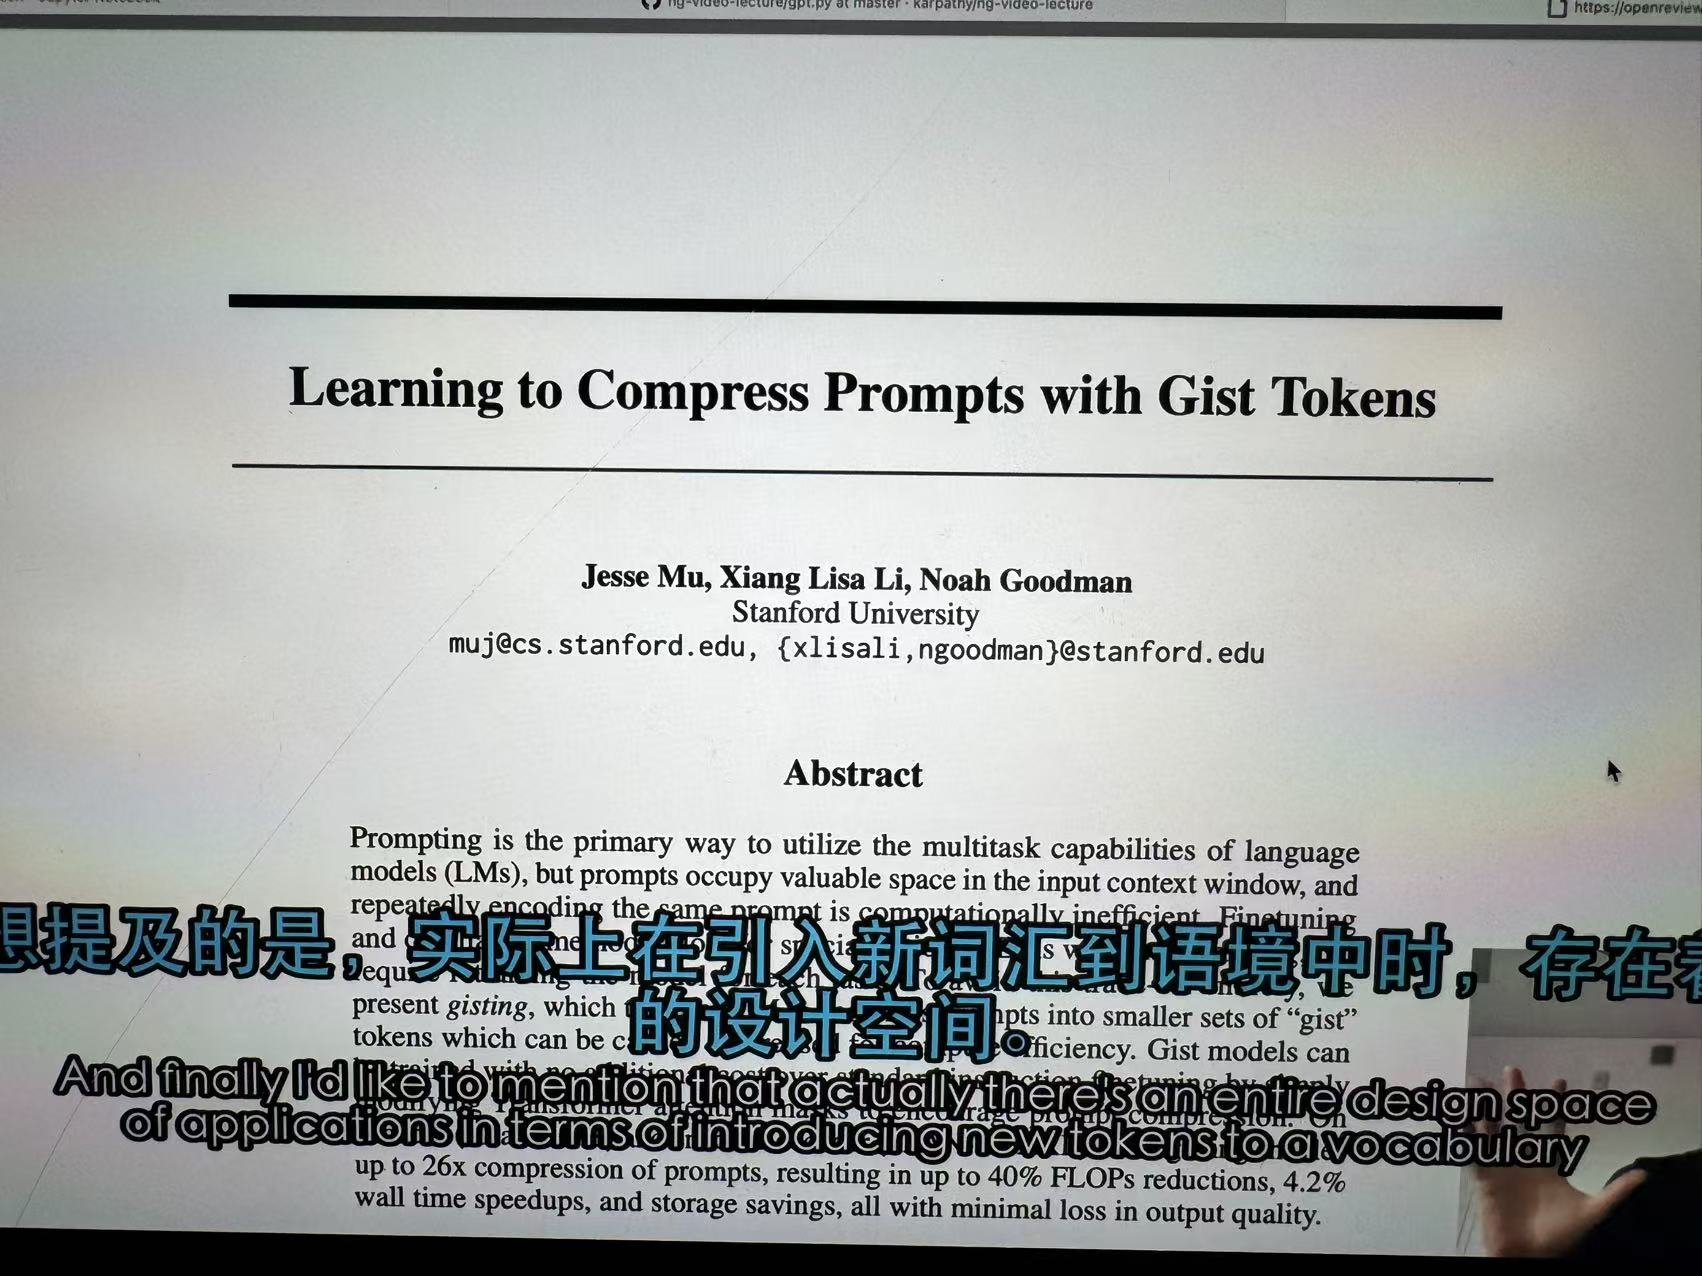